12.1 1

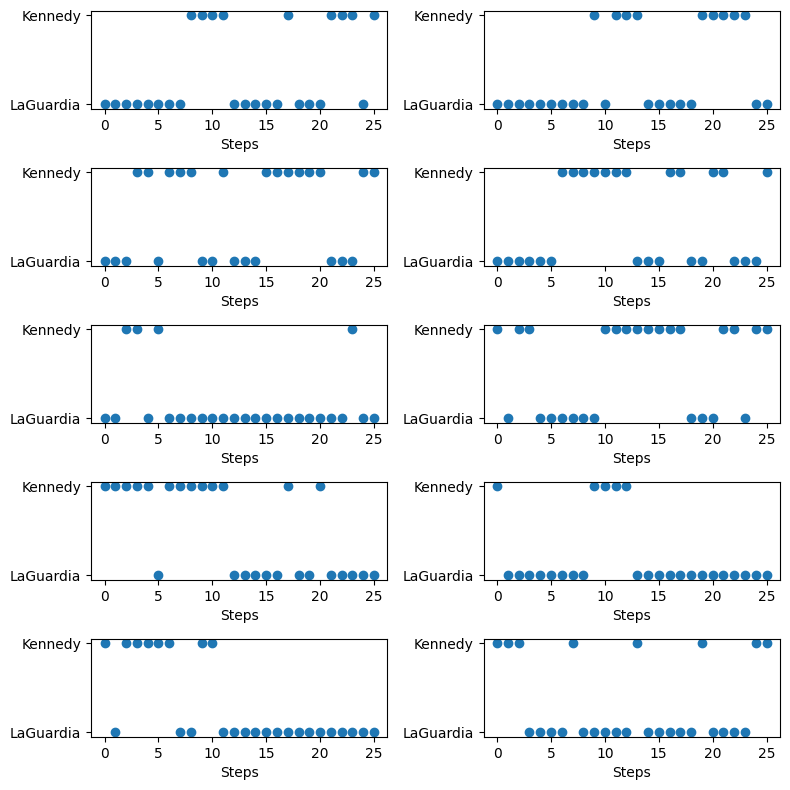

In [72]:
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
import matplotlib.pyplot as plt


def drawFromDistribution(p):
    if isinstance(p, np.matrix): 
        # this converts a matrix row to an array if needed
        p = np.array(p[0, :])
    q = np.cumsum(p)
    u = rnd.random()
    i = 0
    while (u > q[i]):
        i += 1
    return i


def run_markov_chain(initial_state, number_steps, T):
    X = [initial_state]
    for i in range(number_steps):
        x = drawFromDistribution(T[X[i]])
        X.append(x)
    return X


T = np.matrix([[0.8, 0.2], [0.3, 0.7]])

number_steps = 25
initial_state = 0
number_runs = 10

states = ['LaGuardia', 'Kennedy']

number_rows = int(number_runs/2)

fig = plt.figure(figsize=(8, 8))

for i in range(number_runs // 2):
    X = run_markov_chain(initial_state, number_steps, T)
    ax = fig.add_subplot(number_rows, 2, i+1)
    ax.scatter(range(number_steps+1), X)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(states)
    ax.set_xlabel("Steps")
initial_state =1
for i in range(number_runs // 2, number_runs):
    X = run_markov_chain(initial_state, number_steps, T)
    ax = fig.add_subplot(number_rows, 2, i+1)
    ax.scatter(range(number_steps+1), X)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(states)
    ax.set_xlabel("Steps")
    

plt.tight_layout()
plt.show()

12.1 2

In [73]:
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
import matplotlib.pyplot as plt


def drawFromDistribution(p):
    if isinstance(p, np.matrix): 
        # this converts a matrix row to an array if needed
        p = np.array(p[0, :])
    q = np.cumsum(p)
    u = rnd.random()
    i = 0
    while (u > q[i]):
        i += 1
    return i


def run_markov_chain(initial_state, number_steps, T):
    X = [initial_state]
    for i in range(number_steps):
        x = drawFromDistribution(T[X[i]])
        X.append(x)
    return X


T = np.matrix([[0.8, 0.2], [0.3, 0.7]])

number_steps = 25
initial_state = 0
number_runs = 1000

states = ['LaGuardia', 'Kennedy']

number_rows = int(number_runs/2)

fig = plt.figure(figsize=(8, 8))
timeAtKennedyList = []
for i in range(number_runs // 2):
    X = run_markov_chain(initial_state, number_steps, T)
    timeAtKennedy = 0
    for i in range(len(X)):
        if X[i] == 1:
            timeAtKennedy += 1
    timeAtKennedyList.append(timeAtKennedy/number_steps)

initial_state =1
for i in range(number_runs // 2, number_runs):
    X = run_markov_chain(initial_state, number_steps, T)
    timeAtKennedy = 0
    for i in range(len(X)):
        if X[i] == 1:
            timeAtKennedy += 1
    timeAtKennedyList.append(timeAtKennedy/number_steps)
print(f"{sum(timeAtKennedyList)/number_runs} is the empirical fraction of time a car spends at Kennedy airport over {number_runs} runs")

0.41944 is the empirical fraction of time a car spends at Kennedy airport over 1000 runs


<Figure size 800x800 with 0 Axes>

12.1 4

In [82]:
import numpy as np
from scipy.linalg import eig
T  = np.matrix([[0.8, 0.2], [0.3, 0.7]])
w, v_left, v_right = eig(T, left=True)
normalise_version = v_left[:, 0]/sum(v_left[:, 0])
print(normalise_version[1])
print("This is close to the empircal fraction from above")

0.39999999999999997
This is close to the empircal fraction from above


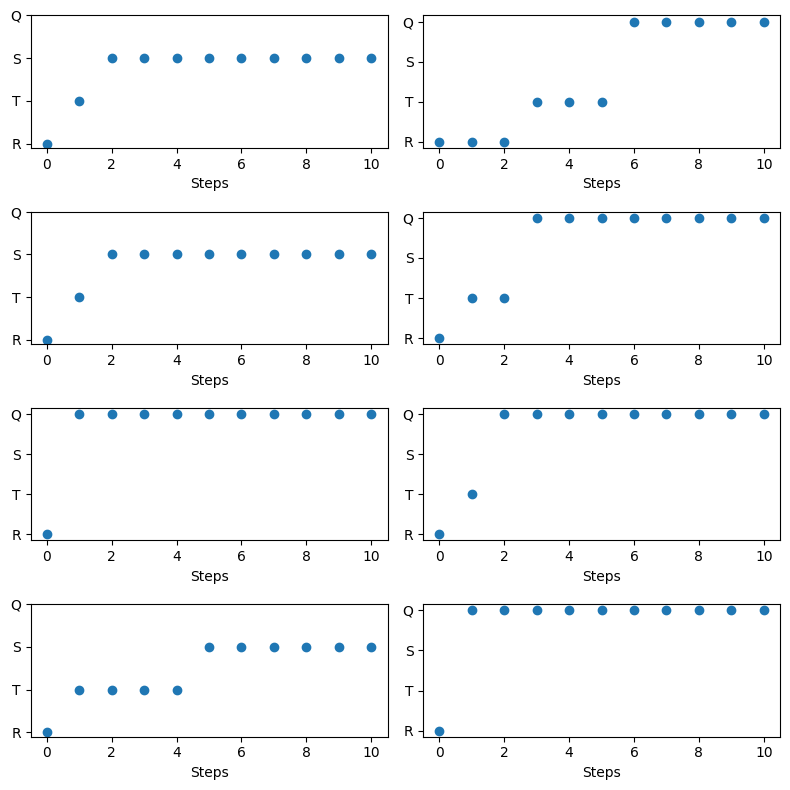

In [75]:
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
import matplotlib.pyplot as plt


def drawFromDistribution(p):
    if isinstance(p, np.matrix): 
        # this converts a matrix row to an array if needed
        p = np.array(p[0, :])
    q = np.cumsum(p)
    u = rnd.random()
    i = 0
    while (u > q[i]):
        i += 1
    return i


def run_markov_chain(initial_state, number_steps, T):
    X = [initial_state]
    for i in range(number_steps):
        x = drawFromDistribution(T[X[i]])
        X.append(x)
    return X


T = np.matrix([[0.2,0.6,0,0.2], [0,0.55,0.15,0.3], [0,0,1,0],[0,0,0,1]])

number_steps = 10
initial_state = 0
number_runs = 8

states = ['R', 'T', 'S', 'Q']

number_rows = int(number_runs/2)

fig = plt.figure(figsize=(8, 8))

for i in range(number_runs):
    X = run_markov_chain(initial_state, number_steps, T)
    ax = fig.add_subplot(number_rows, 2, i+1)
    ax.scatter(range(number_steps+1), X)
    ax.set_yticks([0, 1, 2,3])
    ax.set_yticklabels(states)
    ax.set_xlabel("Steps")
    

plt.tight_layout()

12.2 3

In [76]:
import matplotlib.pyplot as plt
import random as rnd
import numpy as np

def drawFromDistribution(p):
    if isinstance(p, np.matrix): 
        p = np.array(p[0, :])
    q = np.cumsum(p)
    u = rnd.random()
    i = 0
    while u > q[i]:
        i += 1
    return i

def run_markov_chain(initial_state, number_steps, T):
    X = [initial_state]
    for i in range(number_steps):
        x = drawFromDistribution(T[X[i]])
        X.append(x)
    return X

# Transition matrix
T = np.matrix([[0.2, 0.6,0,0.2], [0,0.55,0.15,0.3],[0,0,1,0],[0,0,0,1]])

number_steps = 50
number_runs = 10000  # 6 runs starting from each state

states = ['R', 'T','S','Q']
fig = plt.figure(figsize=(12, 8))

# Run simulations starting in Laguardia (state 0)
#propsOfTime = []
totalScount = 0
totalStepsTaken = 0
for i in range(number_runs):
    X = run_markov_chain(0, number_steps, T)
    if 2 in X:
        totalScount += 1
    counter = 0
    while True:
        if X[counter] == 2 or X[counter] == 3:
            totalStepsTaken =  totalStepsTaken + counter
            break
        if counter == 50:
            break
        counter += 1

print(f"Across {number_runs} runs a proportion of {totalScount/number_runs} made it to supervisor")
print(f"Over {number_runs} runs, on average it took {totalStepsTaken/number_runs} steps to either get to supervisor or quit")

Across 10000 runs a proportion of 0.2466 made it to supervisor
Over 10000 runs, on average it took 2.9478 steps to either get to supervisor or quit


<Figure size 1200x800 with 0 Axes>

13.1 3

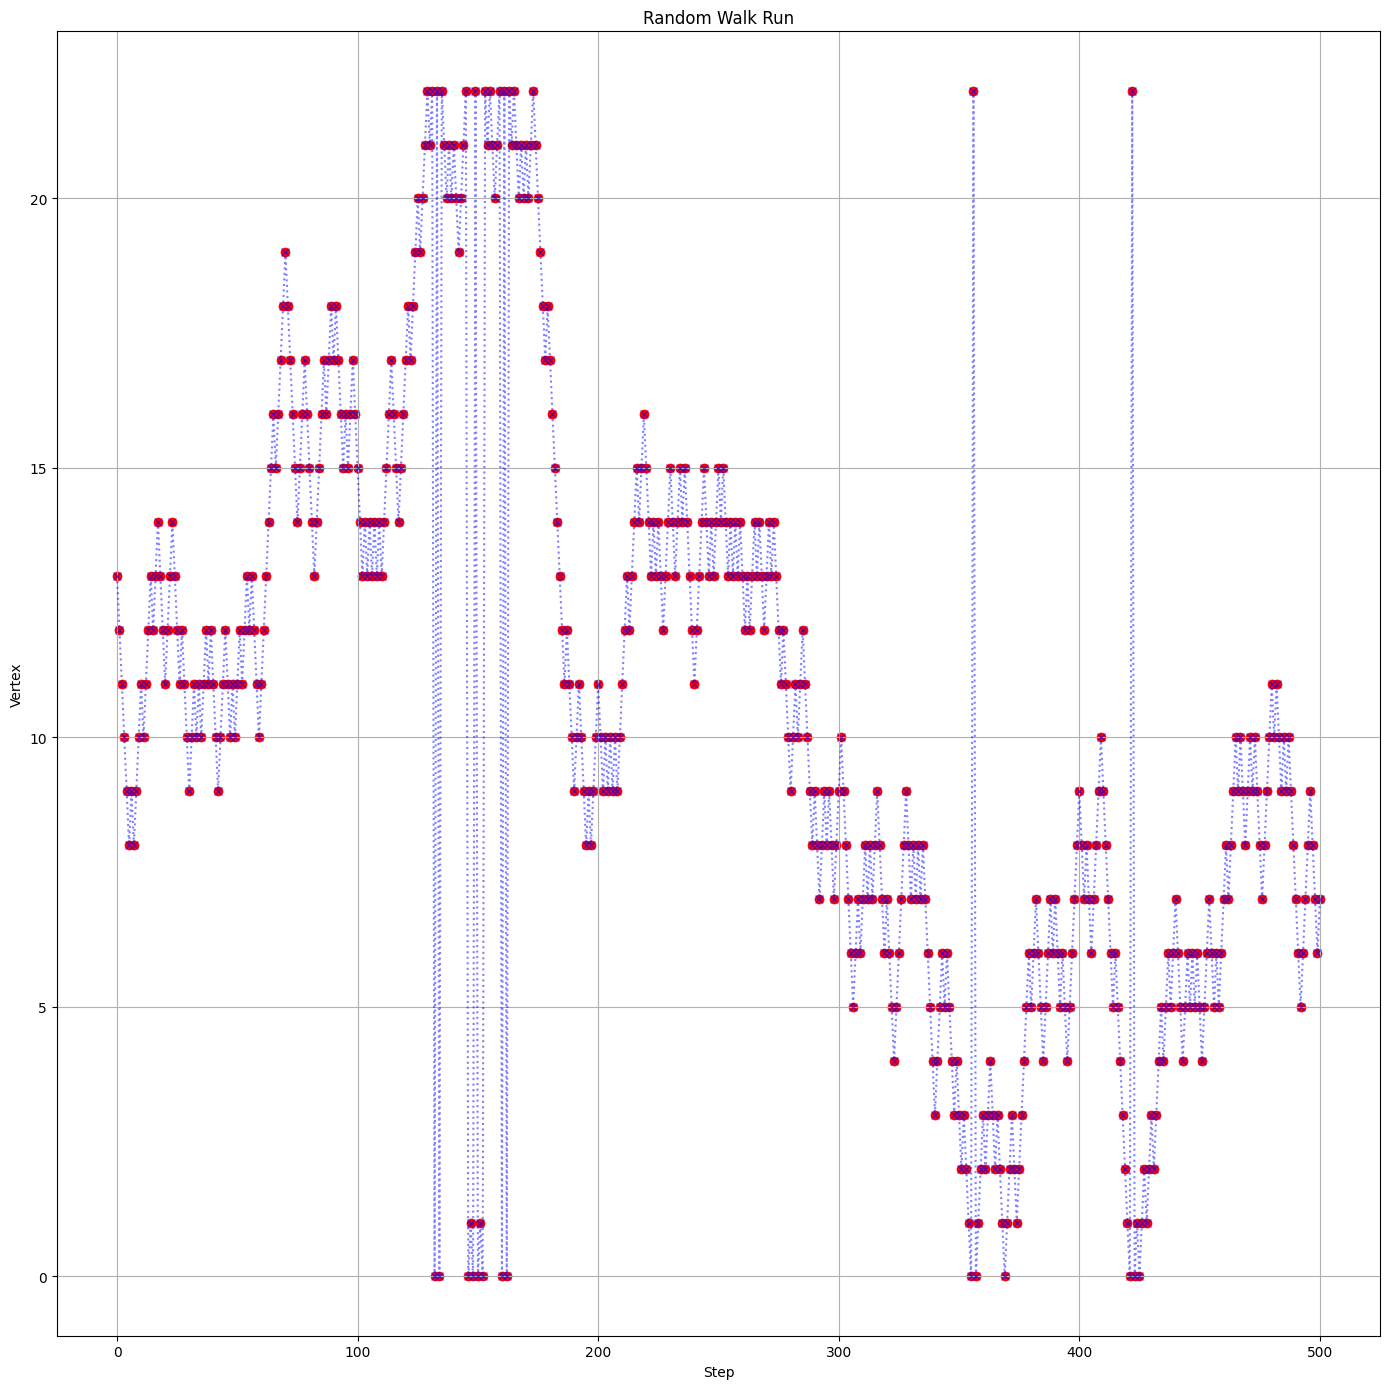

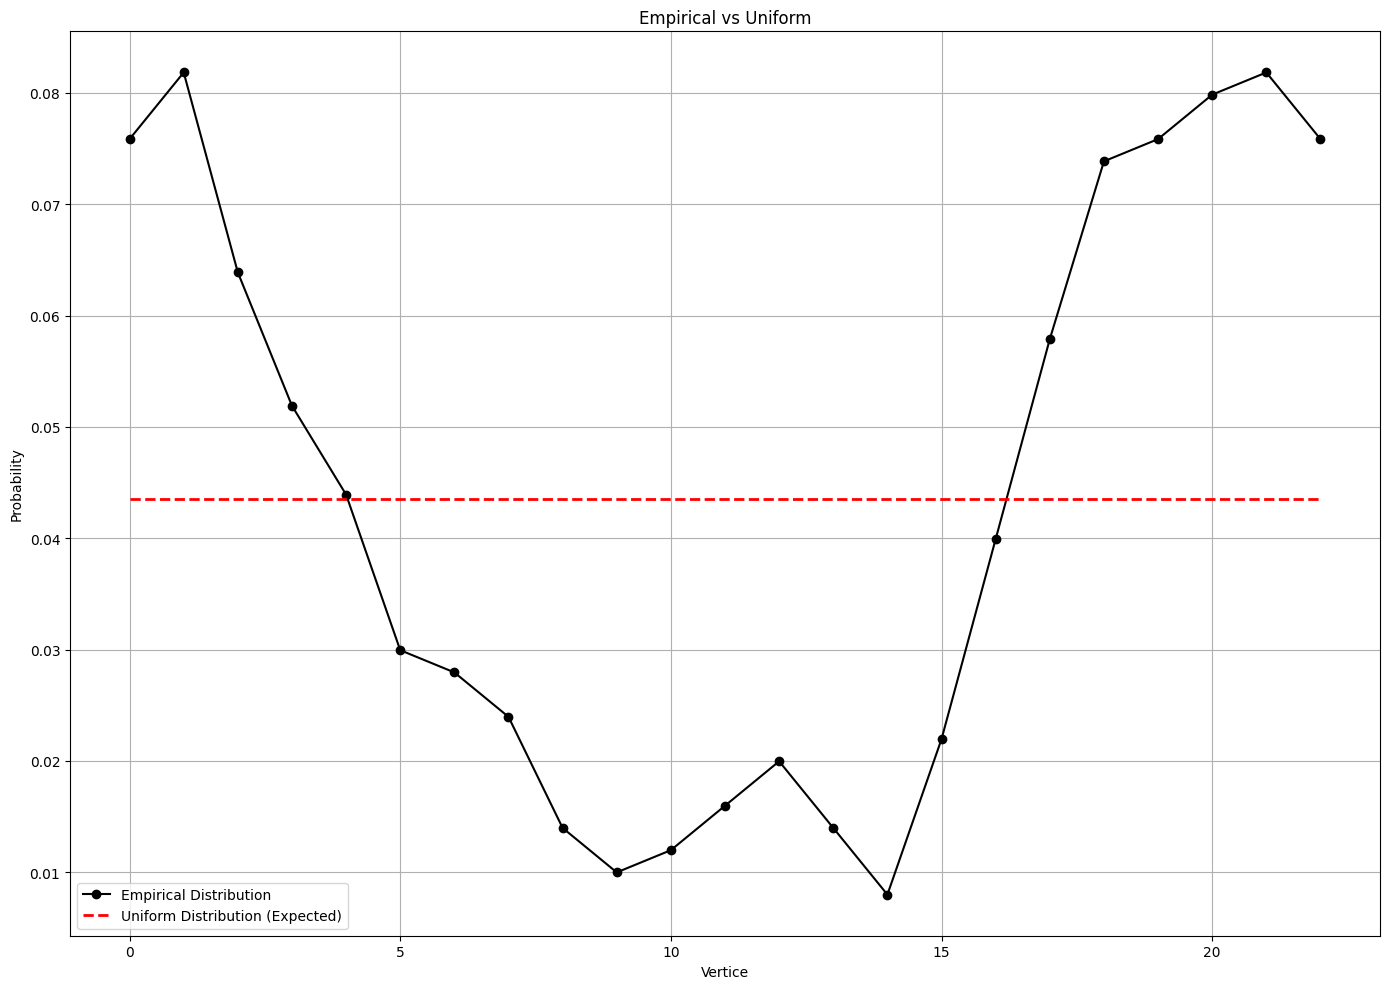

In [77]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rnd
import numpy as np

def random_walk(graph, steps=10):
    
    start_vertex = rnd.choice(list(graph.keys()))
    
    current_vertex = start_vertex
    retList = [current_vertex]
    
    for i in range(steps):
        neighbors = graph[current_vertex]
        if not neighbors: 
            break
        current_vertex = rnd.choice(neighbors)
        retList.append(current_vertex)
    
    return retList

def graphNeighbor(nx_graph):
    return {vertex: list(nx_graph.neighbors(vertex)) for vertex in nx_graph}

# Circular graph
vertices = 23
circular_graph = nx.cycle_graph(vertices)
graph_neighbor = graphNeighbor(circular_graph)


num_runs = 1  # Number of separate runs
steps = 500  # Number of steps for each run
plt.figure(figsize=(14, 14))


walk_path = random_walk(graph_neighbor, steps)
plt.scatter(range(steps + 1), walk_path, color='red')
plt.plot(range(steps + 1), walk_path, linestyle=':', marker='x', color='blue', alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Vertex')
plt.title(f'Random Walk Run')
plt.grid(True)

plt.tight_layout()
plt.show()

# Function to calculate empirical distribution
def get_empirical(walk_path, num_vertices):
    count = np.array([0] * num_vertices, dtype=float)
    for i in walk_path:
        count[i] += 1
    count /= len(walk_path)
    return count

# Plot empirical distributions for each run
uniform_distribution = np.full(vertices, 1 / vertices)

plt.figure(figsize=(14, 10))


# Perform a random walk and calculate empirical distribution
walk_path = random_walk(graph_neighbor, steps)
empirical = get_empirical(walk_path, vertices)
plt.plot(range(vertices), empirical, color='black', linestyle='-', marker='o', markersize=6, label='Empirical Distribution')
plt.plot(range(vertices), uniform_distribution, color='red', linestyle='--', linewidth=2, label='Uniform Distribution (Expected)')
plt.xlabel('Vertice')
plt.ylabel('Probability')
plt.title(f'Empirical vs Uniform')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



13.1 4

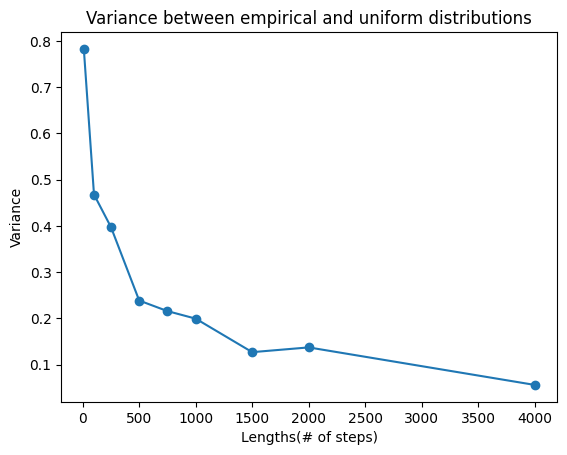

In [78]:
def graphneighbor(nx_graph):
    return {vertex: list(nx_graph.neighbors(vertex)) for vertex in nx_graph}


# Circular graph
vertices = 23
circular_graph = nx.cycle_graph(vertices)
graph_neighbor = graphneighbor(circular_graph)
uniform = np.full(vertices, 1 / vertices)

lengths = [10,100,250,500,750,1000,1500,2000,4000]
variances = []

for l in lengths:
    path = random_walk(graph_neighbor,l)
    empirical = get_empirical(path,vertices)
    distance = 0.5 * np.sum(np.abs(empirical - uniform))
    variances.append(distance)

# Plotting
plt.plot(lengths, variances, marker='o')  # 'marker' makes each data point visible

# Adding labels
plt.xlabel('Lengths(# of steps)')
plt.ylabel('Variance')
plt.title('Variance between empirical and uniform distributions')

# Show the plot
plt.show()


13.1 5

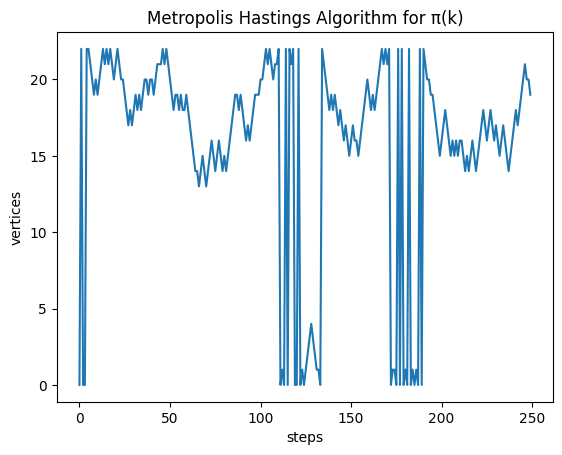

In [79]:
def metropolis_hastings(vertices,steps):
    start = 0
    current = start
    lis = []
    for i in range(steps):
        neighbor = (current + rnd.choice([-1,1]))%vertices
        #if neighbor == vertices:
        #    neighbor = 0
        H_k = np.sin(2 * np.pi * neighbor / vertices)
        targ_distribution = np.exp(-H_k)

        H_k = np.sin(2 * np.pi * current / vertices)
        curr_dist = np.exp(-H_k)
        acceptance_ratio = min(1,targ_distribution/curr_dist)

        if rnd.random() < acceptance_ratio:
            current = neighbor
        lis.append(current)

    return lis

vertices = 23
steps = 250

mh = metropolis_hastings(vertices,steps)
x_axis = range(steps)

plt.plot(x_axis,mh)
plt.xlabel("steps")
plt.ylabel("vertices")
plt.title('Metropolis Hastings Algorithm for π(k)')
plt.show()

13.1 6

50000
23


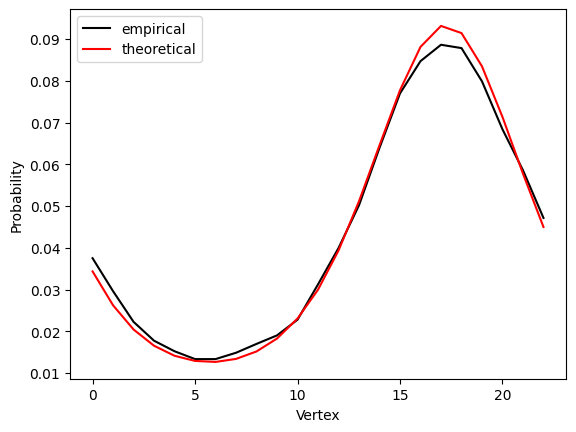

In [80]:
steps = 50000
vertices = 23
mh_trajectory = metropolis_hastings(vertices,steps)
print(len(mh_trajectory))
def empirical(trajectory, vertices):
    prob = np.zeros(vertices)
    for i in trajectory:
        prob[i] += 1
    prob = prob/len(trajectory)
    return prob

prob = empirical(mh_trajectory,vertices)
print(len(prob))
def get_dist(vertex,vertices):
    hk = np.sin(2 * np.pi * vertex / vertices)
    return np.exp(-hk)

theoretical = np.array([get_dist(i,vertices) for i in range(vertices)])
theoretical = theoretical/np.sum(theoretical)

x = range(vertices)
plt.plot(x,prob,color = 'black', label = 'empirical')
plt.plot(x,theoretical,color = 'red', label = 'theoretical')
plt.xlabel('Vertex')
plt.ylabel('Probability')
plt.legend()
plt.show()

13.1 7

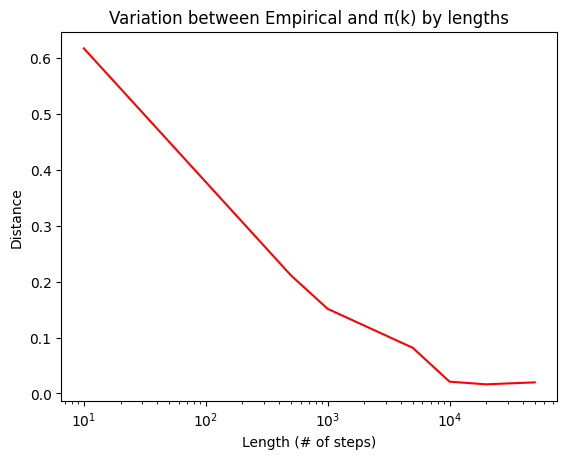

In [81]:
vertices = 23
pi = np.array([np.exp(-np.sin(2 * np.pi * k / vertices)) for k in range(vertices)])
pi = pi / np.sum(pi)

def empirical(trajectory, vertices):
    prob = np.zeros(vertices)
    for i in trajectory:
        prob[i] += 1
    prob = prob/len(trajectory)
    return prob

def metropolis_hastings(vertices,steps):
    start = 0
    current = start
    lis = []
    for i in range(steps):
        neighbor = (current + rnd.choice([-1,1]))%vertices
        #if neighbor == vertices:
        #    neighbor = 0
        H_k = np.sin(2 * np.pi * neighbor / vertices)
        targ_distribution = np.exp(-H_k)

        H_k = np.sin(2 * np.pi * current / vertices)
        curr_dist = np.exp(-H_k)
        acceptance_ratio = min(1,targ_distribution/curr_dist)

        if rnd.random() < acceptance_ratio:
            current = neighbor
        lis.append(current)

    return lis
def get_dis(ml, uniform):
    return 0.5 * np.sum(np.abs(ml - uniform))
lengths = [10, 500, 1000, 5000, 10000, 20000, 50000]
distances = []
for l in lengths:
    mh = metropolis_hastings(vertices,l)
    emp = empirical(mh,vertices)
    dist = get_dis(emp,pi)
    distances.append(dist)
plt.plot(lengths, distances, color='red')
plt.xlabel('Length (# of steps)')
plt.ylabel('Distance')
plt.title('Variation between Empirical and π(k) by lengths')
plt.xscale('log')
plt.show()

    